# csv파일 불러오기

In [128]:
import os
import numpy as np
import pandas as pd

def csv_loader(drive, type):
    if type == 'train':
        data = pd.read_csv(f"{drive}:\\python__\\Final\\train.csv")
    else:
        data = pd.read_csv(f"{drive}:\\python__\\Final\\valid.csv")
    
    if drive == 'd':
        data.name = data.name.str.replace("E","D")
    
    del data['Unnamed: 0']
    print("csv파일 로드 완료")
    
    return data

In [68]:
train = csv_loader('e', 'train')
valid = csv_loader('e', 'valid')

csv파일 로드 완료
csv파일 로드 완료


In [69]:
train

,name,label,label_index
0,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,가,0
1,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,각,1
2,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,간,2
3,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,갇,3
4,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,갈,4
...,...,...,...
269972,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,힐,2347
269973,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,힘,2348
269974,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,힙,2349
269975,E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체...,힛,2350


In [70]:
valid

,name,label,label_index
0,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,가,0
1,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,각,1
2,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,간,2
3,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갇,3
4,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갈,4
...,...,...,...
33109,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힌,2346
33110,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힘,2348
33111,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힙,2349
33112,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힛,2350


# class, def 정의

In [115]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch

class dataset():

    def data_storage(drive, data, start, end):
        drive = drive.upper()

        if len(data) > 100000:
            folder_name = 'train'
        else:
            folder_name = 'valid'

        for i,j in zip(list(data.name)[start:end], range(start,end)):
            img = Image.open(i)
            img = img.resize((50,50))
            y = np.array(img)  # 이미지 -> 넘파이

            scaled_y0 = y[:,:,0]
            # scaled_y1 = y[:,:,1]
            # scaled_y2 = y[:,:,2]

            scaled_y0[(scaled_y0 >= 220)] = 255
            # scaled_y1[(scaled_y1 >= 220)] = 255
            # scaled_y2[(scaled_y2 >= 220)] = 255

            scaled_y0[(scaled_y0 < 220)] = 0
            # scaled_y1[(scaled_y1 < 220)] = 0
            # scaled_y2[(scaled_y2 < 220)] = 0

            scaled_y0 = torch.from_numpy(scaled_y0)
            # scaled_y1 = torch.from_numpy(scaled_y1)
            # scaled_y2 = torch.from_numpy(scaled_y2)

            scaled_y0 = scaled_y0.numpy()

            img_scaled_y = Image.fromarray(scaled_y0) # NumPy array to PIL image
            
            img_scaled_y.save(f'./{folder_name}_data/{j}.png','png')
            
            if j % 3000 == 0:
                print(f"{j}개째 완료")
            
        print(f"{end}개 완료")

    
    def data_ready(drive, data):
        drive = drive.upper()
        
        if len(data) > 100000:
            folder_name = 'train'
        else:
            folder_name = 'valid'
        
        img_path_list = []
        for i in range(len(os.listdir(f"{drive}:\\python__\\Final\\{folder_name}_data\\"))):
            img_name = f"{i}.png"
            img_path = os.path.join(f"{drive}:\\python__\\Final\\{folder_name}_data\\", img_name)
            img_path_list.append(img_path)
        img_path_list

        # 데이터셋 텐서형태로 stack -> MNIST에서 tran.data와 같은 형태
        out_list = []
        for i in range(len(img_path_list)):
            img = Image.open(img_path_list[i])
#             img = img.resize((50,50))
            y = np.array(img)  # 이미지 -> 넘파이
            x = torch.from_numpy(y) # 넘파이 -> 텐서

            out_list.append(x)
            if i % 10000 == 0:
                print(f"{i}까지 진행됨.")
            
        train_data = torch.stack(out_list, dim = 0)

        print("데이터 구축 완료")
        print(train_data.size())
        
        return train_data
        
    
    def save_data_npy(data, label):
        if len(data) > 100000:
            folder_name = 'train'
        else:
            folder_name = 'valid'
            
        # 텐서를 외부파일로저장
        a = data
        a_1 = label
        
        a_np = a.numpy()
        a_np_1 = a_1.numpy()
        
        np.save(f'{folder_name}_data', a_np)
        np.save(f'{folder_name}_target', a_np_1)
        
        np_load = np.load(f'{folder_name}_data.npy')
        np_load_1 = np.load(f'{folder_name}_target.npy')
        
        result = torch.from_numpy(np_load)
        result_1 = torch.from_numpy(np_load_1)
        
        return result, result_1
    
    
    def load_data_npy(data, label):
        # 외부파일을 텐서로 불러오기
        np_load = np.load(data)
        np_load_1 = np.load(label)
        
        result = torch.from_numpy(np_load)
        result_1 = torch.from_numpy(np_load_1)
        
        return result, result_1

    
    def label_loader(data):
        if len(data) > 100000:
            type_data = train_data
            type_target = train_target
        else:
            type_data = valid_data
            type_target = valid_target
            
        target = data.label_index[:len(type_data)]
        type_target = torch.from_numpy(target.values)
        
        print("label 구축 완료")
        print(type_target.size())
        
        return type_target
        
        
    def plot(type, index):
        if type == 'valid':
            type_data = valid_data
        else:
            type_data = train_data
            
        x = type_data[index]
        img = (np.array(x.detach().cpu(), dtype='float'))

        plt.imshow(img, cmap='gray')
        plt.show()

### data_storage

In [ ]:
# 원본 데이터 -> 흑백이미지로 다른 폴더에 저장
# dataset.data_storage('e',12000, 50000)

In [ ]:
# 원본 데이터 -> 흑백이미지로 다른 폴더에 저장
# dataset.data_storage('e',50000, 57416)

In [ ]:
# 원본 데이터 -> 흑백이미지로 다른 폴더에 저장
# dataset.data_storage('e',57416, 119611)

In [10]:
# 원본 데이터 -> 흑백이미지로 다른 폴더에 저장
# dataset.data_storage('d',data,119611, 120000)

120000개 완료


In [18]:
# 원본 데이터 -> 흑백이미지로 다른 폴더에 저장
# dataset.data_storage('d',data,120000, 180000)

120000개째 완료
123000개째 완료
126000개째 완료
129000개째 완료
132000개째 완료
135000개째 완료
138000개째 완료
141000개째 완료
144000개째 완료
147000개째 완료
150000개째 완료
153000개째 완료
156000개째 완료
159000개째 완료
162000개째 완료
165000개째 완료
168000개째 완료
171000개째 완료
174000개째 완료
177000개째 완료
180000개 완료


In [6]:
# 원본 데이터 -> 흑백이미지로 다른 폴더에 저장
# dataset.data_storage('d',data,180037, 190000)

183000개째 완료
186000개째 완료
189000개째 완료
190000개 완료


In [7]:
# 원본 데이터 -> 흑백이미지로 다른 폴더에 저장
# dataset.data_storage('d',data,190000, 270000)

192000개째 완료
195000개째 완료
198000개째 완료
201000개째 완료
204000개째 완료
207000개째 완료
210000개째 완료
213000개째 완료
216000개째 완료
219000개째 완료
222000개째 완료
225000개째 완료
228000개째 완료
231000개째 완료
234000개째 완료
237000개째 완료
240000개째 완료
243000개째 완료
246000개째 완료
249000개째 완료
252000개째 완료
255000개째 완료
258000개째 완료
261000개째 완료
264000개째 완료
267000개째 완료
270000개 완료


In [ ]:
dataset.data_storage('e',valid,0, 35000)

### data_ready

In [8]:
# 다른 폴더에 흑백이미지로 저장된 사진들을 텐서형태로 불러오기
# train_data = dataset.data_ready('e', train)

0까지 진행됨.
10000까지 진행됨.
20000까지 진행됨.
30000까지 진행됨.
40000까지 진행됨.
50000까지 진행됨.
60000까지 진행됨.
70000까지 진행됨.
80000까지 진행됨.
90000까지 진행됨.
100000까지 진행됨.
110000까지 진행됨.
120000까지 진행됨.
130000까지 진행됨.
140000까지 진행됨.
150000까지 진행됨.
160000까지 진행됨.
170000까지 진행됨.
180000까지 진행됨.
190000까지 진행됨.
200000까지 진행됨.
210000까지 진행됨.
220000까지 진행됨.
230000까지 진행됨.
240000까지 진행됨.
250000까지 진행됨.
260000까지 진행됨.
데이터 구축 완료
torch.Size([269977, 50, 50])


In [105]:
# 다른 폴더에 흑백이미지로 저장된 사진들을 텐서형태로 불러오기
valid_data = dataset.data_ready('e', valid)

0까지 진행됨.
10000까지 진행됨.
20000까지 진행됨.
30000까지 진행됨.
데이터 구축 완료
torch.Size([33114, 50, 50])


### label_loader

In [106]:
# 텐서형태로 불러온 데이터들의 label_index를 불러오기
train_target = dataset.label_loader(train)

label 구축 완료
torch.Size([269977])


In [108]:
# 텐서형태로 불러온 데이터들의 label_index를 불러오기
valid_target = dataset.label_loader(valid)

label 구축 완료
torch.Size([33114])


### save_data_npy

In [10]:
# 두가지의 텐서형태를 외부 파일로 저장하기 -> 그 외부파일 다시 불러오기
train_data_ex, train_target_ex = dataset.save_data_npy(train_data, train_target)

In [109]:
# 두가지의 텐서형태를 외부 파일로 저장하기 -> 그 외부파일 다시 불러오기
valid_data_ex, valid_target_ex = dataset.save_data_npy(valid_data, valid_target)

### load_data_npy

In [110]:
# 외부파일을 새로 불러오기
a,b = dataset.load_data_npy('train_data.npy', 'train_target.npy')

In [111]:
# 외부파일을 새로 불러오기
c,d = dataset.load_data_npy('valid_data.npy', 'valid_target.npy')

In [112]:
# 검증

# 전처리 데이터 vs 외부파일을 저장하고 다시 불러온 데이터
print((train_data != train_data_ex).sum())

# 외부파일로 저장하고 다시 불러온 데이터 vs 처음부터 외부파일 냅다 불러온 데이터
print((train_data_ex != a).sum())

# 처음부터 외부파일 냅다 불러온 데이터 vs 전처리 데이터
print((a != train_data).sum())

tensor(0)
tensor(0)
tensor(0)


In [113]:
# 검증

# 전처리 데이터 vs 외부파일을 저장하고 다시 불러온 데이터
print((valid_data != valid_data_ex).sum())

# 외부파일로 저장하고 다시 불러온 데이터 vs 처음부터 외부파일 냅다 불러온 데이터
print((valid_data_ex != c).sum())

# 처음부터 외부파일 냅다 불러온 데이터 vs 전처리 데이터
print((c != valid_data).sum())

tensor(0)
tensor(0)
tensor(0)


### plot

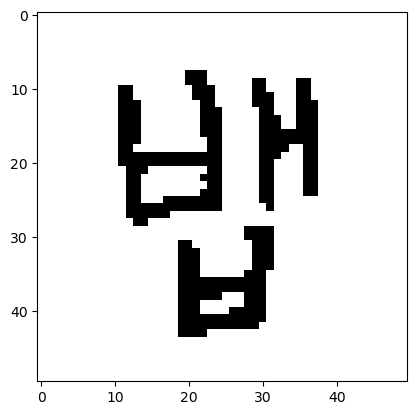

In [127]:
# 흑백 그림 예시 보기
dataset.plot('valid',9050)

# #############################################################
# #############################################################
# #############################################################

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

x = train_data.float() / 255.
y = train_target

x = x.view(x.size(0), -1)
print(x.shape, y.shape)

input_size = x.size(-1)
output_size = int(max(y)) + 1

print('input_size: %d, output_size: %d' % (input_size, output_size))

In [ ]:
# Train / Valid ratio
ratios = [.6, .2, .2]

train_cnt = int(x.size(0) * ratios[0])
valid_cnt = int(x.size(0) * ratios[1])
test_cnt = x.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt,test_cnt]

print("Train %d / Valid %d / Test %d samples." % (train_cnt, valid_cnt, test_cnt))

indices = torch.randperm(x.size(0))

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = list(x.split(cnts, dim=0))
y = list(y.split(cnts, dim=0))

# x += [(test.data.float() / 255.).view(test_cnt, -1)]
# y += [test.targets]

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, 2000),
    nn.LeakyReLU(),
    nn.Linear(2000, 1500),
    nn.LeakyReLU(),
    nn.Linear(1500, 1000),
    nn.LeakyReLU(),
    nn.Linear(1000, 500),
    nn.LeakyReLU(),
    nn.Linear(500, 300),
    nn.LeakyReLU(),
    nn.Linear(300, 200),
    nn.LeakyReLU(),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.Linear(100, output_size),
    nn.LogSoftmax(dim=-1),
)

model

In [ ]:
crit = nn.NLLLoss()

In [ ]:
optimizer = optim.Adam(model.parameters())

In [ ]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

In [ ]:
model = model.to(device)

x = [x_i.to(device) for x_i in x]
y = [y_i.to(device) for y_i in y]

In [ ]:
n_epochs = 1000
batch_size = 256
print_interval = 10

In [ ]:
from copy import deepcopy

lowest_loss = np.inf
best_model = None

early_stop = 50
lowest_epoch = np.inf

In [ ]:
train_history, valid_history = [], []

for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0)).to(device)
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)
    
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)
    
    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i.squeeze())

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()        
        train_loss += float(loss) # This is very important to prevent memory leak.

    train_loss = train_loss / len(x_)
        
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)
        
        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = crit(y_hat_i, y_i.squeeze())
            
            valid_loss += float(loss)
            
            y_hat += [y_hat_i]
            
    valid_loss = valid_loss / len(x_)
    
    train_history += [train_loss]
    valid_history += [valid_loss]
        
    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e  valid_loss=%.4e  lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))
        
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

In [ ]:
plot_from = 0

plt.figure(figsize=(20, 10))
plt.grid(True)
plt.title("Train / Valid Loss History")
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],
)
plt.yscale('log')
plt.show()

In [ ]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[-1].split(batch_size, dim=0)
    y_ = y[-1].split(batch_size, dim=0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i.squeeze())

        test_loss += loss # Gradient is already detached.

        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim=0)

print("Validation loss: %.4e" % test_loss)

In [ ]:
correct_cnt = (y[-1].squeeze() == torch.argmax(y_hat, dim=-1)).sum()
total_cnt = float(y[-1].size(0))

print('Accuracy: %.4f' % (correct_cnt / total_cnt))

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
pd.DataFrame(confusion_matrix(y[-1], torch.argmax(y_hat, dim=-1)),
             index=['true_%d' % i for i in range(1576)],
             columns=['pred_%d' % i for i in range(1576)])

# ####################################


In [ ]:
import os
import numpy as np

In [ ]:
path = 'E:\\다양한 형태의 한글 문자 OCR\\Training\\[원천]Training_필기체\\1.글자\\000'

In [ ]:
flist = os.listdir(path)
flist

In [ ]:
import pandas as pd

data = pd.read_csv("E:\\다양한 형태의 한글 문자 OCR\\sample.csv")

In [ ]:
path = 'E:/다양한 형태의 한글 문자 OCR/Training/[원천]Training_필기체/1.글자/000/'
data.name = f"{path}" + data.name

In [ ]:
data.name

In [ ]:
data.name[0]

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch

In [ ]:
img = Image.open('D:\\다양한 형태의 한글 문자 OCR\\Training\\[원천]Training_필기체\\1.글자\\000\\00130001001.jpg')
img = img.resize((50,50))
y = np.array(img)  # 이미지 -> 넘파이

In [ ]:
scaled_y0 = y[:,:,0]
# scaled_y1 = y[:,:,1]
# scaled_y2 = y[:,:,2]

scaled_y0[(scaled_y0 >= 220)] = 255
# scaled_y1[(scaled_y1 >= 220)] = 255
# scaled_y2[(scaled_y2 >= 220)] = 255

scaled_y0[(scaled_y0 < 220)] = 0
# scaled_y1[(scaled_y1 < 220)] = 0
# scaled_y2[(scaled_y2 < 220)] = 0

scaled_y0 = torch.from_numpy(scaled_y0)
# scaled_y1 = torch.from_numpy(scaled_y1)
# scaled_y2 = torch.from_numpy(scaled_y2)

In [ ]:
type(scaled_y0)

In [ ]:
def plot(x):
    # img = (np.array(x.detach().cpu(), dtype='float')).reshape(70,70)
    img = (np.array(x.detach().cpu(), dtype='float'))

    plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
plot(scaled_y0)

In [ ]:
scaled_y0 = scaled_y0.numpy()

img_scaled_y = Image.fromarray(scaled_y0) # NumPy array to PIL image
img_scaled_y.save('./scaled_data/sadasd.png','png')

# scaled_data 폴더에 사진 저장

In [ ]:
list(data.name)[100:200]

In [ ]:
for i,j in zip(list(data.name)[:10], range(10)):
    img = Image.open(i)
    img = img.resize((50,50))
    y = np.array(img)  # 이미지 -> 넘파이

    scaled_y0 = y[:,:,0]
    # scaled_y1 = y[:,:,1]
    # scaled_y2 = y[:,:,2]

    scaled_y0[(scaled_y0 >= 220)] = 255
    # scaled_y1[(scaled_y1 >= 220)] = 255
    # scaled_y2[(scaled_y2 >= 220)] = 255

    scaled_y0[(scaled_y0 < 220)] = 0
    # scaled_y1[(scaled_y1 < 220)] = 0
    # scaled_y2[(scaled_y2 < 220)] = 0

    scaled_y0 = torch.from_numpy(scaled_y0)
    # scaled_y1 = torch.from_numpy(scaled_y1)
    # scaled_y2 = torch.from_numpy(scaled_y2)

    scaled_y0 = scaled_y0.numpy()

    img_scaled_y = Image.fromarray(scaled_y0) # NumPy array to PIL image
    img_scaled_y.save('./train_data111/{}.png' .format(j),'png')


    # 1000개당 1분 => 다 돌리면 4시간

## 현재까지 상황 정리

* 경로명+파일명 / label 로 정리된 csv, txt파일 존재

1. 로컬에 있는 원본 손글씨 이미지 데이터( RGB 3차원으로 이루어려있으며 size는 약(110,110) )를 흑백 1차원의 (50,50)으로 조정하여 새로 생성
-> 여기서 1개의 글씨를 3개의 데이터로 증강할 수 있음.

2. 생성된 글씨 이미지를 텐서형태로 표현 가능 -> MNIST의 data.train형태와 동일


3. 2번의 dataset을 외부파일(npy)로 저장 및 불러오기 가능

----------------------------------

## 생각할 점

1. label도 텐서형태로 맞춰주어야하는데 글씨마다 손수 인덱스 labeling 필요

=> 매 파일마다 들어있는 글씨 이미지 데이터 개수가 달라서 "사용하는 글씨들에 대해서 labeling을 진행하고 동일한 글씨만 살리는 형식"으로 진행

2. 코랩에서 GPU로 돌리고싶은데... 1번이 해결되야 빠르게 진행 가능

가각간갇갈갉갊감갑값갓갔강갖갗같갚갛개객갠갤갬갭갯갰갱갸갹갼걀걋걍걔걘걜거걱건걷걸걺검겁것겄겅겆겉겊겋게겐겔겜겝겟겠겡겨격겪견겯결겸겹겻겼경곁계곈곌곕곗고곡곤곧골곪곬곯곰곱곳공곶과곽관괄괆괌괍괏광괘괜괠괩괬괭괴괵괸괼굄굅굇굉교굔굘굡굣구국군굳굴굵굶굻굼굽굿궁궂궈궉권궐궜궝궤궷귀귁귄귈귐귑귓규균귤그극근귿글긁금급긋긍긔기긱긴긷길긺김깁깃깅깆깊까깍깎깐깔깖깜깝깟깠깡깥깨깩깬깰깸깹깻깼깽꺄꺅꺌꺼꺽꺾껀껄껌껍껏껐껑께껙껜껨껫껭껴껸껼꼇꼈꼍꼐꼬꼭꼰꼲꼴꼼꼽꼿꽁꽂꽃꽈꽉꽐꽜꽝꽤꽥꽹꾀꾄꾈꾐꾑꾕꾜꾸꾹꾼꿀꿇꿈꿉꿋꿍꿎꿔꿜꿨꿩꿰꿱꿴꿸뀀뀁뀄뀌뀐뀔뀜뀝뀨끄끅끈끊끌끎끓끔끕끗끙끝끼끽낀낄낌낍낏낑나낙낚난낟날낡낢남납낫났낭낮낯낱낳내낵낸낼냄냅냇냈냉냐냑냔냘냠냥너넉넋넌널넒넓넘넙넛넜넝넣네넥넨넬넴넵넷넸넹녀녁년녈념녑녔녕녘녜녠노녹논놀놂놈놉놋농높놓놔놘놜놨뇌뇐뇔뇜뇝뇟뇨뇩뇬뇰뇹뇻뇽누눅눈눋눌눔눕눗눙눠눴눼뉘뉜뉠뉨뉩뉴뉵뉼늄늅늉느늑는늘늙늚늠늡늣능늦늪늬늰늴니닉닌닐닒님닙닛닝닢다닥닦단닫달닭닮닯닳담답닷닸당닺닻닿대댁댄댈댐댑댓댔댕댜더덕덖던덛덜덞덟덤덥덧덩덫덮데덱덴델뎀뎁뎃뎄뎅뎌뎐뎔뎠뎡뎨뎬도독돈돋돌돎돐돔돕돗동돛돝돠돤돨돼됐되된될됨됩됫됬됴두둑둔둘둠둡둣둥둬뒀뒈뒝뒤뒨뒬뒵뒷뒹듀듄듈듐듕드득든듣들듦듬듭듯등듸디딕딘딛딜딤딥딧딨딩딪따딱딴딸땀땁땃땄땅땋때땍땐땔땜땝땟땠땡떠떡떤떨떪떫떰떱떳떴떵떻떼떽뗀뗄뗌뗍뗏뗐뗑뗘뗬또똑똔똘똥똬똴뙈뙤뙨뚜뚝뚠뚤뚫뚬뚱뛔뛰뛴뛸뜀뜁뜅뜨뜩뜬뜯뜰뜸뜹뜻띄띈띌띔띕띠띤띨띰띱띳띵라락란랄람랍랏랐랑랒랖랗래랙랜랠램랩랫랬랭랴략랸럇량러럭런럴럼럽럿렀렁렇레렉렌렐렘렙렛렝려력련렬렴렵렷렸령례롄롑롓로록론롤롬롭롯롱롸롼뢍뢨뢰뢴뢸룀룁룃룅료룐룔룝룟룡루룩룬룰룸룹룻룽뤄뤘뤠뤼뤽륀륄륌륏륑류륙륜률륨륩륫륭르륵른를름릅릇릉릊릍릎리릭린릴림립릿링마막만많맏말맑맒맘맙맛망맞맡맣매맥맨맬맴맵맷맸맹맺먀먁먈먕머먹먼멀멂멈멉멋멍멎멓메멕멘멜멤멥멧멨멩며멱면멸몃몄명몇몌모목몫몬몰몲몸몹못몽뫄뫈뫘뫙뫼묀묄묍묏묑묘묜묠묩묫무묵묶문묻물묽묾뭄뭅뭇뭉뭍뭏뭐뭔뭘뭡뭣뭬뮈뮌뮐뮤뮨뮬뮴뮷므믄믈믐믓미믹민믿밀밂밈밉밋밌밍및밑바박밖밗반받발밝밞밟밤밥밧방밭배백밴밸뱀뱁뱃뱄뱅뱉뱌뱍뱐뱝버벅번벋벌벎범법벗벙벚베벡벤벧벨벰벱벳벴벵벼벽변별볍볏볐병볕볘볜보복볶본볼봄봅봇봉봐봔봤봬뵀뵈뵉뵌뵐뵘뵙뵤뵨부북분붇불붉붊붐붑붓붕붙붚붜붤붰붸뷔뷕뷘뷜뷩뷰뷴뷸븀븃븅브븍븐블븜븝븟비빅빈빌빎빔빕빗빙빚빛빠빡빤빨빪빰빱빳빴빵빻빼빽뺀뺄뺌뺍뺏뺐뺑뺘뺙뺨뻐뻑뻔뻗뻘뻠뻣뻤뻥뻬뼁뼈뼉뼘뼙뼛뼜뼝뽀뽁뽄뽈뽐뽑뽕뾔뾰뿅뿌뿍뿐뿔뿜뿟뿡쀼쁑쁘쁜쁠쁨쁩삐삑삔삘삠삡삣삥사삭삯산삳살삵삶삼삽삿샀상샅새색샌샐샘샙샛샜생샤샥샨샬샴샵샷샹섀섄섈섐섕서석섞섟선섣설섦섧섬섭섯섰성섶세섹센셀셈셉셋셌셍셔셕션셜셤셥셧셨셩셰셴셸솅소속솎손솔솖솜솝솟송솥솨솩솬솰솽쇄쇈쇌쇔쇗쇘쇠쇤쇨쇰쇱쇳쇼쇽숀숄숌숍숏숑수숙순숟술숨숩숫숭숯숱숲숴쉈쉐쉑쉔쉘쉠쉥쉬쉭쉰쉴쉼쉽쉿슁슈슉슐슘슛슝스슥슨슬슭슴습슷승시식신싣실싫심십싯싱싶싸싹싻싼쌀쌈쌉쌌쌍쌓쌔쌕쌘쌜쌤쌥쌨쌩썅써썩썬썰썲썸썹썼썽쎄쎈쎌쏀쏘쏙쏜쏟쏠쏢쏨쏩쏭쏴쏵쏸쐈쐐쐤쐬쐰쐴쐼쐽쑈쑤쑥쑨쑬쑴쑵쑹쒀쒔쒜쒸쒼쓩쓰쓱쓴쓸쓺쓿씀씁씌씐씔씜씨씩씬씰씸씹씻씽아악안앉않알앍앎앓암압앗았앙앝앞애액앤앨앰앱앳앴앵야약얀얄얇얌얍얏양얕얗얘얜얠얩어억언얹얻얼얽얾엄업없엇었엉엊엌엎에엑엔엘엠엡엣엥여역엮연열엶엷염엽엾엿였영옅옆옇예옌옐옘옙옛옜오옥온올옭옮옰옳옴옵옷옹옻와왁완왈왐왑왓왔왕왜왝왠왬왯왱외왹왼욀욈욉욋욍요욕욘욜욤욥욧용우욱운울욹욺움웁웃웅워웍원월웜웝웠웡웨웩웬웰웸웹웽위윅윈윌윔윕윗윙유육윤율윰윱윳융윷으윽은을읊음읍읏응읒읓읔읕읖읗의읜읠읨읫이익인일읽읾잃임입잇있잉잊잎자작잔잖잗잘잚잠잡잣잤장잦재잭잰잴잼잽잿쟀쟁쟈쟉쟌쟎쟐쟘쟝쟤쟨쟬저적전절젊점접젓정젖제젝젠젤젬젭젯젱져젼졀졈졉졌졍졔조족존졸졺좀좁좃종좆좇좋좌좍좔좝좟좡좨좼좽죄죈죌죔죕죗죙죠죡죤죵주죽준줄줅줆줌줍줏중줘줬줴쥐쥑쥔쥘쥠쥡쥣쥬쥰쥴쥼즈즉즌즐즘즙즛증지직진짇질짊짐집짓징짖짙짚짜짝짠짢짤짧짬짭짯짰짱째짹짼쨀쨈쨉쨋쨌쨍쨔쨘쨩쩌쩍쩐쩔쩜쩝쩟쩠쩡쩨쩽쪄쪘쪼쪽쫀쫄쫌쫍쫏쫑쫓쫘쫙쫠쫬쫴쬈쬐쬔쬘쬠쬡쭁쭈쭉쭌쭐쭘쭙쭝쭤쭸쭹쮜쮸쯔쯤쯧쯩찌찍찐찔찜찝찡찢찧차착찬찮찰참찹찻찼창찾채책챈챌챔챕챗챘챙챠챤챦챨챰챵처척천철첨첩첫첬청체첵첸첼쳄쳅쳇쳉쳐쳔쳤쳬쳰촁초촉촌촐촘촙촛총촤촨촬촹최쵠쵤쵬쵭쵯쵱쵸춈추축춘출춤춥춧충춰췄췌췐취췬췰췸췹췻췽츄츈츌츔츙츠측츤츨츰츱츳층치칙친칟칠칡침칩칫칭카칵칸칼캄캅캇캉캐캑캔캘캠캡캣캤캥캬캭컁커컥컨컫컬컴컵컷컸컹케켁켄켈켐켑켓켕켜켠켤켬켭켯켰켱켸코콕콘콜콤콥콧콩콰콱콴콸쾀쾅쾌쾡쾨쾰쿄쿠쿡쿤쿨쿰쿱쿳쿵쿼퀀퀄퀑퀘퀭퀴퀵퀸퀼큄큅큇큉큐큔큘큠크큭큰클큼큽킁키킥킨킬킴킵킷킹타탁탄탈탉탐탑탓탔탕태택탠탤탬탭탯탰탱탸턍터턱턴털턺텀텁텃텄텅테텍텐텔템텝텟텡텨텬텼톄톈토톡톤톨톰톱톳통톺톼퇀퇘퇴퇸툇툉툐투툭툰툴툼툽툿퉁퉈퉜퉤튀튁튄튈튐튑튕튜튠튤튬튱트특튼튿틀틂틈틉틋틔틘틜틤틥티틱틴틸팀팁팃팅파팍팎판팔팖팜팝팟팠팡팥패팩팬팰팸팹팻팼팽퍄퍅퍼퍽펀펄펌펍펏펐펑페펙펜펠펨펩펫펭펴편펼폄폅폈평폐폘폡폣포폭폰폴폼폽폿퐁퐈퐝푀푄표푠푤푭푯푸푹푼푿풀풂품풉풋풍풔풩퓌퓐퓔퓜퓟퓨퓬퓰퓸퓻퓽프픈플픔픕픗피픽핀필핌핍핏핑하학한할핥함합핫항핳해핵핸핼햄햅햇했행햐향허헉헌헐헒험헙헛헝헤헥헨헬헴헵헷헹혀혁현혈혐협혓혔형혜혠혤혭호혹혼홀홅홈홉홋홍홑화확환활홧황홰홱홴횃횅회획횐횔횝횟횡효횬횰횹횻후훅훈훌훑훔훗훙훠훤훨훰훵훼훽휀휄휑휘휙휜휠휨휩휫휭휴휵휸휼흄흇흉흐흑흔흖흗흘흙흠흡흣흥흩희흰흴흼흽힁히힉힌힐힘힙힛힝힣ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㄲㄸㅃㅆㅉㄺㅀㄻㄼㅄㄳㄶㄵㄽㅏㅑㅓㅕㅗㅛㅜㅠㅡㅣㅒㅖABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890~`!@#$%^&*(){}[]-_=+;:'",<.>/?\|

### labeling

In [29]:
jamo = '가각간갇갈갉갊감갑값갓갔강갖갗같갚갛개객갠갤갬갭갯갰갱갸갹갼걀걋걍걔걘걜거걱건걷걸걺검겁것겄겅겆겉겊겋게겐겔겜겝겟겠겡겨격겪견겯결겸겹겻겼경곁계곈곌곕곗고곡곤곧골곪곬곯곰곱곳공곶과곽관괄괆괌괍괏광괘괜괠괩괬괭괴괵괸괼굄굅굇굉교굔굘굡굣구국군굳굴굵굶굻굼굽굿궁궂궈궉권궐궜궝궤궷귀귁귄귈귐귑귓규균귤그극근귿글긁금급긋긍긔기긱긴긷길긺김깁깃깅깆깊까깍깎깐깔깖깜깝깟깠깡깥깨깩깬깰깸깹깻깼깽꺄꺅꺌꺼꺽꺾껀껄껌껍껏껐껑께껙껜껨껫껭껴껸껼꼇꼈꼍꼐꼬꼭꼰꼲꼴꼼꼽꼿꽁꽂꽃꽈꽉꽐꽜꽝꽤꽥꽹꾀꾄꾈꾐꾑꾕꾜꾸꾹꾼꿀꿇꿈꿉꿋꿍꿎꿔꿜꿨꿩꿰꿱꿴꿸뀀뀁뀄뀌뀐뀔뀜뀝뀨끄끅끈끊끌끎끓끔끕끗끙끝끼끽낀낄낌낍낏낑나낙낚난낟날낡낢남납낫났낭낮낯낱낳내낵낸낼냄냅냇냈냉냐냑냔냘냠냥너넉넋넌널넒넓넘넙넛넜넝넣네넥넨넬넴넵넷넸넹녀녁년녈념녑녔녕녘녜녠노녹논놀놂놈놉놋농높놓놔놘놜놨뇌뇐뇔뇜뇝뇟뇨뇩뇬뇰뇹뇻뇽누눅눈눋눌눔눕눗눙눠눴눼뉘뉜뉠뉨뉩뉴뉵뉼늄늅늉느늑는늘늙늚늠늡늣능늦늪늬늰늴니닉닌닐닒님닙닛닝닢다닥닦단닫달닭닮닯닳담답닷닸당닺닻닿대댁댄댈댐댑댓댔댕댜더덕덖던덛덜덞덟덤덥덧덩덫덮데덱덴델뎀뎁뎃뎄뎅뎌뎐뎔뎠뎡뎨뎬도독돈돋돌돎돐돔돕돗동돛돝돠돤돨돼됐되된될됨됩됫됬됴두둑둔둘둠둡둣둥둬뒀뒈뒝뒤뒨뒬뒵뒷뒹듀듄듈듐듕드득든듣들듦듬듭듯등듸디딕딘딛딜딤딥딧딨딩딪따딱딴딸땀땁땃땄땅땋때땍땐땔땜땝땟땠땡떠떡떤떨떪떫떰떱떳떴떵떻떼떽뗀뗄뗌뗍뗏뗐뗑뗘뗬또똑똔똘똥똬똴뙈뙤뙨뚜뚝뚠뚤뚫뚬뚱뛔뛰뛴뛸뜀뜁뜅뜨뜩뜬뜯뜰뜸뜹뜻띄띈띌띔띕띠띤띨띰띱띳띵라락란랄람랍랏랐랑랒랖랗래랙랜랠램랩랫랬랭랴략랸럇량러럭런럴럼럽럿렀렁렇레렉렌렐렘렙렛렝려력련렬렴렵렷렸령례롄롑롓로록론롤롬롭롯롱롸롼뢍뢨뢰뢴뢸룀룁룃룅료룐룔룝룟룡루룩룬룰룸룹룻룽뤄뤘뤠뤼뤽륀륄륌륏륑류륙륜률륨륩륫륭르륵른를름릅릇릉릊릍릎리릭린릴림립릿링마막만많맏말맑맒맘맙맛망맞맡맣매맥맨맬맴맵맷맸맹맺먀먁먈먕머먹먼멀멂멈멉멋멍멎멓메멕멘멜멤멥멧멨멩며멱면멸몃몄명몇몌모목몫몬몰몲몸몹못몽뫄뫈뫘뫙뫼묀묄묍묏묑묘묜묠묩묫무묵묶문묻물묽묾뭄뭅뭇뭉뭍뭏뭐뭔뭘뭡뭣뭬뮈뮌뮐뮤뮨뮬뮴뮷므믄믈믐믓미믹민믿밀밂밈밉밋밌밍및밑바박밖밗반받발밝밞밟밤밥밧방밭배백밴밸뱀뱁뱃뱄뱅뱉뱌뱍뱐뱝버벅번벋벌벎범법벗벙벚베벡벤벧벨벰벱벳벴벵벼벽변별볍볏볐병볕볘볜보복볶본볼봄봅봇봉봐봔봤봬뵀뵈뵉뵌뵐뵘뵙뵤뵨부북분붇불붉붊붐붑붓붕붙붚붜붤붰붸뷔뷕뷘뷜뷩뷰뷴뷸븀븃븅브븍븐블븜븝븟비빅빈빌빎빔빕빗빙빚빛빠빡빤빨빪빰빱빳빴빵빻빼빽뺀뺄뺌뺍뺏뺐뺑뺘뺙뺨뻐뻑뻔뻗뻘뻠뻣뻤뻥뻬뼁뼈뼉뼘뼙뼛뼜뼝뽀뽁뽄뽈뽐뽑뽕뾔뾰뿅뿌뿍뿐뿔뿜뿟뿡쀼쁑쁘쁜쁠쁨쁩삐삑삔삘삠삡삣삥사삭삯산삳살삵삶삼삽삿샀상샅새색샌샐샘샙샛샜생샤샥샨샬샴샵샷샹섀섄섈섐섕서석섞섟선섣설섦섧섬섭섯섰성섶세섹센셀셈셉셋셌셍셔셕션셜셤셥셧셨셩셰셴셸솅소속솎손솔솖솜솝솟송솥솨솩솬솰솽쇄쇈쇌쇔쇗쇘쇠쇤쇨쇰쇱쇳쇼쇽숀숄숌숍숏숑수숙순숟술숨숩숫숭숯숱숲숴쉈쉐쉑쉔쉘쉠쉥쉬쉭쉰쉴쉼쉽쉿슁슈슉슐슘슛슝스슥슨슬슭슴습슷승시식신싣실싫심십싯싱싶싸싹싻싼쌀쌈쌉쌌쌍쌓쌔쌕쌘쌜쌤쌥쌨쌩썅써썩썬썰썲썸썹썼썽쎄쎈쎌쏀쏘쏙쏜쏟쏠쏢쏨쏩쏭쏴쏵쏸쐈쐐쐤쐬쐰쐴쐼쐽쑈쑤쑥쑨쑬쑴쑵쑹쒀쒔쒜쒸쒼쓩쓰쓱쓴쓸쓺쓿씀씁씌씐씔씜씨씩씬씰씸씹씻씽아악안앉않알앍앎앓암압앗았앙앝앞애액앤앨앰앱앳앴앵야약얀얄얇얌얍얏양얕얗얘얜얠얩어억언얹얻얼얽얾엄업없엇었엉엊엌엎에엑엔엘엠엡엣엥여역엮연열엶엷염엽엾엿였영옅옆옇예옌옐옘옙옛옜오옥온올옭옮옰옳옴옵옷옹옻와왁완왈왐왑왓왔왕왜왝왠왬왯왱외왹왼욀욈욉욋욍요욕욘욜욤욥욧용우욱운울욹욺움웁웃웅워웍원월웜웝웠웡웨웩웬웰웸웹웽위윅윈윌윔윕윗윙유육윤율윰윱윳융윷으윽은을읊음읍읏응읒읓읔읕읖읗의읜읠읨읫이익인일읽읾잃임입잇있잉잊잎자작잔잖잗잘잚잠잡잣잤장잦재잭잰잴잼잽잿쟀쟁쟈쟉쟌쟎쟐쟘쟝쟤쟨쟬저적전절젊점접젓정젖제젝젠젤젬젭젯젱져젼졀졈졉졌졍졔조족존졸졺좀좁좃종좆좇좋좌좍좔좝좟좡좨좼좽죄죈죌죔죕죗죙죠죡죤죵주죽준줄줅줆줌줍줏중줘줬줴쥐쥑쥔쥘쥠쥡쥣쥬쥰쥴쥼즈즉즌즐즘즙즛증지직진짇질짊짐집짓징짖짙짚짜짝짠짢짤짧짬짭짯짰짱째짹짼쨀쨈쨉쨋쨌쨍쨔쨘쨩쩌쩍쩐쩔쩜쩝쩟쩠쩡쩨쩽쪄쪘쪼쪽쫀쫄쫌쫍쫏쫑쫓쫘쫙쫠쫬쫴쬈쬐쬔쬘쬠쬡쭁쭈쭉쭌쭐쭘쭙쭝쭤쭸쭹쮜쮸쯔쯤쯧쯩찌찍찐찔찜찝찡찢찧차착찬찮찰참찹찻찼창찾채책챈챌챔챕챗챘챙챠챤챦챨챰챵처척천철첨첩첫첬청체첵첸첼쳄쳅쳇쳉쳐쳔쳤쳬쳰촁초촉촌촐촘촙촛총촤촨촬촹최쵠쵤쵬쵭쵯쵱쵸춈추축춘출춤춥춧충춰췄췌췐취췬췰췸췹췻췽츄츈츌츔츙츠측츤츨츰츱츳층치칙친칟칠칡침칩칫칭카칵칸칼캄캅캇캉캐캑캔캘캠캡캣캤캥캬캭컁커컥컨컫컬컴컵컷컸컹케켁켄켈켐켑켓켕켜켠켤켬켭켯켰켱켸코콕콘콜콤콥콧콩콰콱콴콸쾀쾅쾌쾡쾨쾰쿄쿠쿡쿤쿨쿰쿱쿳쿵쿼퀀퀄퀑퀘퀭퀴퀵퀸퀼큄큅큇큉큐큔큘큠크큭큰클큼큽킁키킥킨킬킴킵킷킹타탁탄탈탉탐탑탓탔탕태택탠탤탬탭탯탰탱탸턍터턱턴털턺텀텁텃텄텅테텍텐텔템텝텟텡텨텬텼톄톈토톡톤톨톰톱톳통톺톼퇀퇘퇴퇸툇툉툐투툭툰툴툼툽툿퉁퉈퉜퉤튀튁튄튈튐튑튕튜튠튤튬튱트특튼튿틀틂틈틉틋틔틘틜틤틥티틱틴틸팀팁팃팅파팍팎판팔팖팜팝팟팠팡팥패팩팬팰팸팹팻팼팽퍄퍅퍼퍽펀펄펌펍펏펐펑페펙펜펠펨펩펫펭펴편펼폄폅폈평폐폘폡폣포폭폰폴폼폽폿퐁퐈퐝푀푄표푠푤푭푯푸푹푼푿풀풂품풉풋풍풔풩퓌퓐퓔퓜퓟퓨퓬퓰퓸퓻퓽프픈플픔픕픗피픽핀필핌핍핏핑하학한할핥함합핫항핳해핵핸핼햄햅햇했행햐향허헉헌헐헒험헙헛헝헤헥헨헬헴헵헷헹혀혁현혈혐협혓혔형혜혠혤혭호혹혼홀홅홈홉홋홍홑화확환활홧황홰홱홴횃횅회획횐횔횝횟횡효횬횰횹횻후훅훈훌훑훔훗훙훠훤훨훰훵훼훽휀휄휑휘휙휜휠휨휩휫휭휴휵휸휼흄흇흉흐흑흔흖흗흘흙흠흡흣흥흩희흰흴흼흽힁히힉힌힐힘힙힛힝힣'

In [30]:
jamo_list = [jamo[i] for i in range(len(jamo))]
jamo_list

['가',
 '각',
 '간',
 '갇',
 '갈',
 '갉',
 '갊',
 '감',
 '갑',
 '값',
 '갓',
 '갔',
 '강',
 '갖',
 '갗',
 '같',
 '갚',
 '갛',
 '개',
 '객',
 '갠',
 '갤',
 '갬',
 '갭',
 '갯',
 '갰',
 '갱',
 '갸',
 '갹',
 '갼',
 '걀',
 '걋',
 '걍',
 '걔',
 '걘',
 '걜',
 '거',
 '걱',
 '건',
 '걷',
 '걸',
 '걺',
 '검',
 '겁',
 '것',
 '겄',
 '겅',
 '겆',
 '겉',
 '겊',
 '겋',
 '게',
 '겐',
 '겔',
 '겜',
 '겝',
 '겟',
 '겠',
 '겡',
 '겨',
 '격',
 '겪',
 '견',
 '겯',
 '결',
 '겸',
 '겹',
 '겻',
 '겼',
 '경',
 '곁',
 '계',
 '곈',
 '곌',
 '곕',
 '곗',
 '고',
 '곡',
 '곤',
 '곧',
 '골',
 '곪',
 '곬',
 '곯',
 '곰',
 '곱',
 '곳',
 '공',
 '곶',
 '과',
 '곽',
 '관',
 '괄',
 '괆',
 '괌',
 '괍',
 '괏',
 '광',
 '괘',
 '괜',
 '괠',
 '괩',
 '괬',
 '괭',
 '괴',
 '괵',
 '괸',
 '괼',
 '굄',
 '굅',
 '굇',
 '굉',
 '교',
 '굔',
 '굘',
 '굡',
 '굣',
 '구',
 '국',
 '군',
 '굳',
 '굴',
 '굵',
 '굶',
 '굻',
 '굼',
 '굽',
 '굿',
 '궁',
 '궂',
 '궈',
 '궉',
 '권',
 '궐',
 '궜',
 '궝',
 '궤',
 '궷',
 '귀',
 '귁',
 '귄',
 '귈',
 '귐',
 '귑',
 '귓',
 '규',
 '균',
 '귤',
 '그',
 '극',
 '근',
 '귿',
 '글',
 '긁',
 '금',
 '급',
 '긋',
 '긍',
 '긔',
 '기',
 '긱',
 '긴',
 '긷',
 '길',
 '긺',
 '김',
 '깁'

In [31]:
dictionary = {string : i for i,string in enumerate(jamo_list)}
print(dictionary)

{'가': 0, '각': 1, '간': 2, '갇': 3, '갈': 4, '갉': 5, '갊': 6, '감': 7, '갑': 8, '값': 9, '갓': 10, '갔': 11, '강': 12, '갖': 13, '갗': 14, '같': 15, '갚': 16, '갛': 17, '개': 18, '객': 19, '갠': 20, '갤': 21, '갬': 22, '갭': 23, '갯': 24, '갰': 25, '갱': 26, '갸': 27, '갹': 28, '갼': 29, '걀': 30, '걋': 31, '걍': 32, '걔': 33, '걘': 34, '걜': 35, '거': 36, '걱': 37, '건': 38, '걷': 39, '걸': 40, '걺': 41, '검': 42, '겁': 43, '것': 44, '겄': 45, '겅': 46, '겆': 47, '겉': 48, '겊': 49, '겋': 50, '게': 51, '겐': 52, '겔': 53, '겜': 54, '겝': 55, '겟': 56, '겠': 57, '겡': 58, '겨': 59, '격': 60, '겪': 61, '견': 62, '겯': 63, '결': 64, '겸': 65, '겹': 66, '겻': 67, '겼': 68, '경': 69, '곁': 70, '계': 71, '곈': 72, '곌': 73, '곕': 74, '곗': 75, '고': 76, '곡': 77, '곤': 78, '곧': 79, '골': 80, '곪': 81, '곬': 82, '곯': 83, '곰': 84, '곱': 85, '곳': 86, '공': 87, '곶': 88, '과': 89, '곽': 90, '관': 91, '괄': 92, '괆': 93, '괌': 94, '괍': 95, '괏': 96, '광': 97, '괘': 98, '괜': 99, '괠': 100, '괩': 101, '괬': 102, '괭': 103, '괴': 104, '괵': 105, '괸': 106, '괼': 107, '굄': 108, '굅': 109, '굇': 110,

In [32]:
for i in jamo_list:
    data.label_index[data.label == i] = dictionary[i]

C:\Users\ska06\AppData\Local\Temp\ipykernel_16792\4115116947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.label_index[data.label == i] = dictionary[i]


KeyboardInterrupt: 

In [ ]:
print(data.head())
print("")
print(data.isnull().sum())

In [ ]:
data.label_index

# valid data

In [17]:
# 전체 파일 리스트 생성 - 레이블명
# import os

# path = 'E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation_필기체\1.글자\130'
    
label_files = ['138.txt', '139.txt', '140_149.txt', '150_152.txt']

# 전체 파일 리스트 생성 - 이미지명
name_files = ['138_img.txt', '139_img.txt', '140_149_img.txt', '150_152_img.txt']

# 최초 빈 dataframe 선언 / 이후 concat
final_pd = pd.DataFrame(columns = ['name','label'])

# 이미지명, 레이블명 묶어서 df생성 및 concat
for i,j in zip(label_files, name_files):
    with open(f"{i}", 'r', encoding = 'utf8') as l:
        label_txt = l.readlines()
    
    with open(f"{j}", 'r', encoding = 'utf8') as n:
        label_name = n.readlines()
    
    label_list = [label[1] for label in label_txt]
    name_list = [label.replace("\"","").replace("\n","") for label in label_name]

    label_pd = pd.DataFrame(label_list, columns = ['label'])
    name_pd = pd.DataFrame(name_list, columns = ['name'])
    
    join_pd = name_pd.join(label_pd)
        
    final_pd = pd.concat([final_pd, join_pd])

# 인덱스 번호 재정립
final_pd.index = range(len(final_pd))

# 결과
final_pd

,name,label
0,13830001001.jpg,가
1,13830001002.jpg,각
2,13830001003.jpg,간
3,13830001004.jpg,갇
4,13830001005.jpg,갈
...,...,...
33109,15230019005.jpg,힌
33110,15230019007.jpg,힘
33111,15230019008.jpg,힙
33112,15230019009.jpg,힛


In [20]:
path = 'E:\\다양한 형태의 한글 문자 OCR\\Validation\\[원천]validation_필기체\\1.글자\\130\\'

In [21]:
path

'E:\\다양한 형태의 한글 문자 OCR\\Validation\\[원천]validation_필기체\\1.글자\\130\\'

In [25]:
final_pd.name = f"{path}" + final_pd.name

In [37]:
final_pd

,name,label
0,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,가
1,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,각
2,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,간
3,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갇
4,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갈
...,...,...
33109,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힌
33110,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힘
33111,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힙
33112,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힛


In [38]:
final_pd['label_index'] = 0

In [39]:
final_pd.name[0]

'E:\\다양한 형태의 한글 문자 OCR\\Validation\\[원천]validation_필기체\\1.글자\\130\\13830001001.jpg'

In [40]:
for i in jamo_list:
    final_pd.label_index[final_pd.label == i] = dictionary[i]

C:\Users\ska06\AppData\Local\Temp\ipykernel_16792\142638996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_pd.label_index[final_pd.label == i] = dictionary[i]


In [41]:
print(final_pd.head())
print("")
print(final_pd.isnull().sum())

                                                name label  label_index
0  E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...     가            0
1  E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...     각            1
2  E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...     간            2
3  E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...     갇            3
4  E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...     갈            4

name           0
label          0
label_index    0
dtype: int64


In [42]:
data.label_index

0            0
1            1
2            2
3            3
4            4
          ... 
269972    2347
269973    2348
269974    2349
269975    2350
269976    2351
Name: label_index, Length: 269977, dtype: int64

In [49]:
final_pd

,name,label,label_index
0,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,가,0
1,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,각,1
2,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,간,2
3,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갇,3
4,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갈,4
...,...,...,...
33109,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힌,2346
33110,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힘,2348
33111,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힙,2349
33112,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힛,2350


In [53]:
final_pd.to_csv('valid.csv')

In [54]:
pd.read_csv('valid.csv')

,Unnamed: 0,name,label,label_index
0,0,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,가,0
1,1,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,각,1
2,2,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,간,2
3,3,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갇,3
4,4,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,갈,4
...,...,...,...,...
33109,33109,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힌,2346
33110,33110,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힘,2348
33111,33111,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힙,2349
33112,33112,E:\다양한 형태의 한글 문자 OCR\Validation\[원천]validation...,힛,2350
